# **Notebook Correlation Study**

## Objectives

* Determine the the house attributes that correlates with the target. The target is 'sale price'

## Inputs

* Cleaned dataset from the previous step (data_cleaning), namely the outputs/datasets/house_prices_cleaned.csv 

## Outputs

*  As per defined business requirement number one, client expects data visualisations of variables/attributes correlated with sale price. Hence, output of this notebook are data plots/visualisations to be used in the Streamlit App

## Conclusions from the correlation study

*  


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\My_Folders\\CodeInstitute\\Project_5_files\\Project-5\\Project-5\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\My_Folders\\CodeInstitute\\Project_5_files\\Project-5\\Project-5'

In [5]:
import os; print(os.getcwd())

c:\My_Folders\CodeInstitute\Project_5_files\Project-5\Project-5


# Load Data

In [6]:
import pandas as pd

file_path = r"C:\My_Folders\CodeInstitute\Project_5_files\Project-5\Project-5\outputs\datasets\cleaned\HousePricesCleaned.csv"

df = pd.read_csv(file_path)


# Data Exploration

Data Profiling to review the dataset. Particular focus how individual variables do have correlation with target ('sale price').

Data Exploration is achieved with Pandas Profiling.
Pandas Profiling shows that 10 variables have missing values. I have no idea why values are missing here since house_prices_cleaned.csv where
all missing data was imputed was used as the source for the Pandas Profiling. I will proceed from here to see if I can still remove the
variables with missing values in a subsequent step. 

---

In [7]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

C:\Users\wstab\AppData\Local\Temp\ipykernel_38224\962869596.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation and PPS Analyses

Pandas Profiling shows one variable to be of nature "text" rather than of nature "numeric". From the DataCleaning&FeatureEngineering excel spreadsheet, it is known I deal with categorical of ordinal nature.

Categorical variable must be encoded with OneHotEncoder to be used in correlation and PPS analysis.


Section 2 content

In [8]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(5)


(1460, 22)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,...,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.000000,706,150,548,2003.0,1710,8450,65.0,...,5,7,856,2003,2003,208500,1,0,0,0
1,1262,0.0,3.000000,978,284,460,1976.0,1262,9600,80.0,...,8,6,1262,1976,1976,181500,0,1,0,0
2,920,866.0,3.000000,486,434,608,2001.0,1786,11250,68.0,...,5,7,920,2001,2002,223500,1,0,0,0
3,961,0.0,2.883272,216,540,642,1998.0,1717,9550,60.0,...,5,7,756,1915,1970,140000,1,0,0,0
4,1145,0.0,4.000000,655,490,836,2000.0,2198,14260,84.0,...,5,8,1145,2000,2000,250000,1,0,0,0


---

- Heatmaps to be created to visualise correlation matrix of dataset
- Calculation of correlation matrices and PPS matrix and display results
- Code taken from CI ProdictePowerScore Unit1: Introduction, Video No. 6

In [9]:
import os

# create the directory where images are stored
os.makedirs('docs/plots', exist_ok=True)


In [10]:
import numpy as np
import ppscore as pps
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline


def heatmap_corr(df,threshold, figsize=(20,12), font_annot = 8):
  """
  Function to create heatmap using correlations.
  """
  if len(df.columns) > 1:
    mask = np.zeros_like(df, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(df) < threshold] = True

    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                linewidth=0.5
                     )
    axes.set_yticklabels(df.columns, rotation = 0)
    plt.ylim(len(df.columns),0)
     # Save heatmaps to docs folder
    if df.name == "corr_spearman":
      plt.savefig(f'docs/plots/heatmap_corr_spearman.png', bbox_inches='tight')
    else:
      plt.savefig(f'docs/plots/heatmap_corr_pearson.png', bbox_inches='tight')
    plt.show()


def heatmap_pps(df,threshold, figsize=(20,12), font_annot = 8):
    """
    Function to create heatmap using pps.
    """
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, xticklabels=True,yticklabels=True,
                       mask=mask,cmap='rocket_r', annot_kws={"size": font_annot},
                       linewidth=0.05,linecolor='grey')
      
      plt.ylim(len(df.columns),0)
      # Save heatmap to docs folder
      plt.savefig(f'docs/plots/heatmap_pps.png', bbox_inches='tight')
      plt.show()


def CalculateCorrAndPPS(df):
  """
  Function to calculate correlations and pps.
  """
  df_corr_spearman = df.corr(method="spearman")
  df_corr_spearman.name = 'corr_spearman'
  df_corr_pearson = df.corr(method="pearson")
  df_corr_pearson.name = 'corr_pearson'

  pps_matrix_raw = pps.matrix(df)
  pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

  pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
  print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
  print(pps_score_stats.round(3))

  return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix,CorrThreshold,PPS_Threshold,
                      figsize=(20,12), font_annot=8 ):
  """
  Function to display the correlations and pps.
  """

  print("\n")
  print("* Analyze how the target variable for your ML models are correlated with other variables (features and target)")
  print("* Analyze multi-colinearity, that is, how the features are correlated among themselves")

  print("\n")
  print("*** Heatmap: Spearman Correlation ***")
  print("It evaluates monotonic relationship \n")
  heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Pearson Correlation ***")
  print("It evaluates the linear relationship between two continuous variables \n")
  heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Power Predictive Score (PPS) ***")
  print(f"PPS detects linear or non-linear relationships between two columns.\n"
        f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
  heatmap_pps(df=pps_matrix,threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)



The functions defined in the cell immediately above are invoked to calculate the correlations and pps (predictive power score). The linear and monotonic relationships between the features and the target is evaluated.

NOTE

In [11]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df_ohe)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  462.0  0.046  0.102  0.0  0.0  0.0  0.037  0.677


The DisplayCorrAndPPS function displays the correlations and pps



* Analyze how the target variable for your ML models are correlated with other variables (features and target)
* Analyze multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



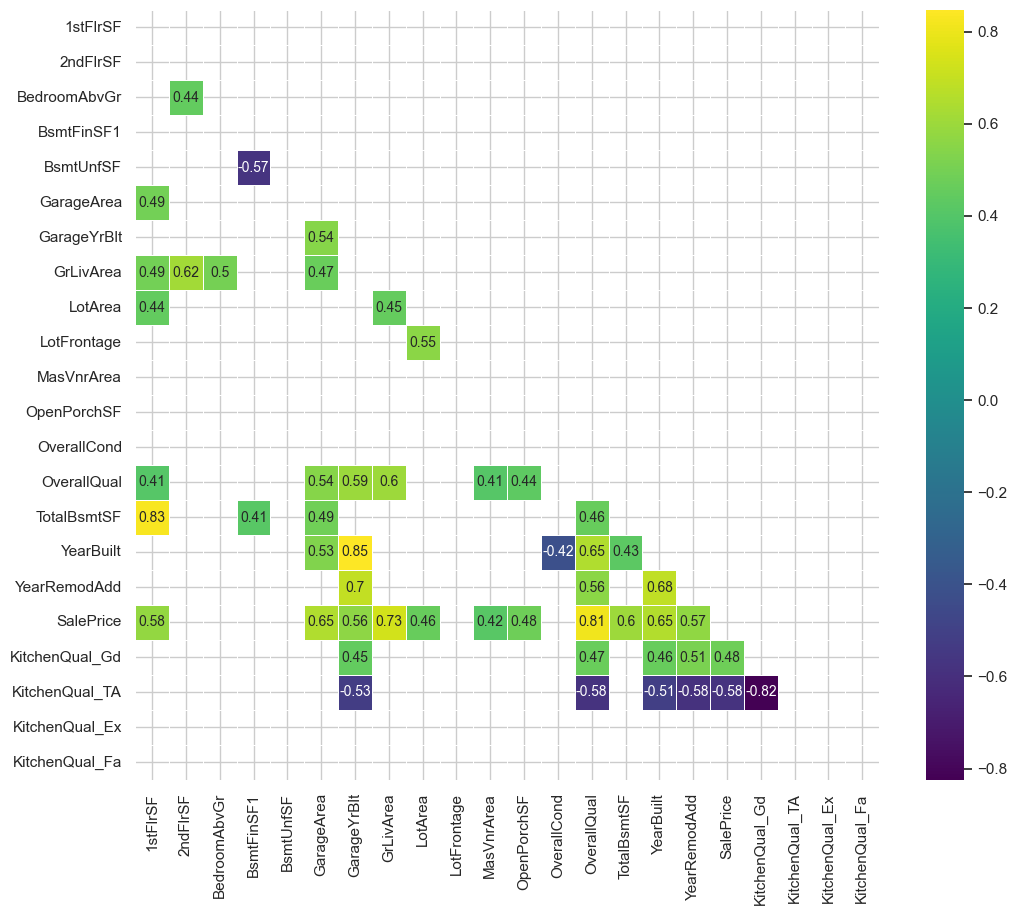



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



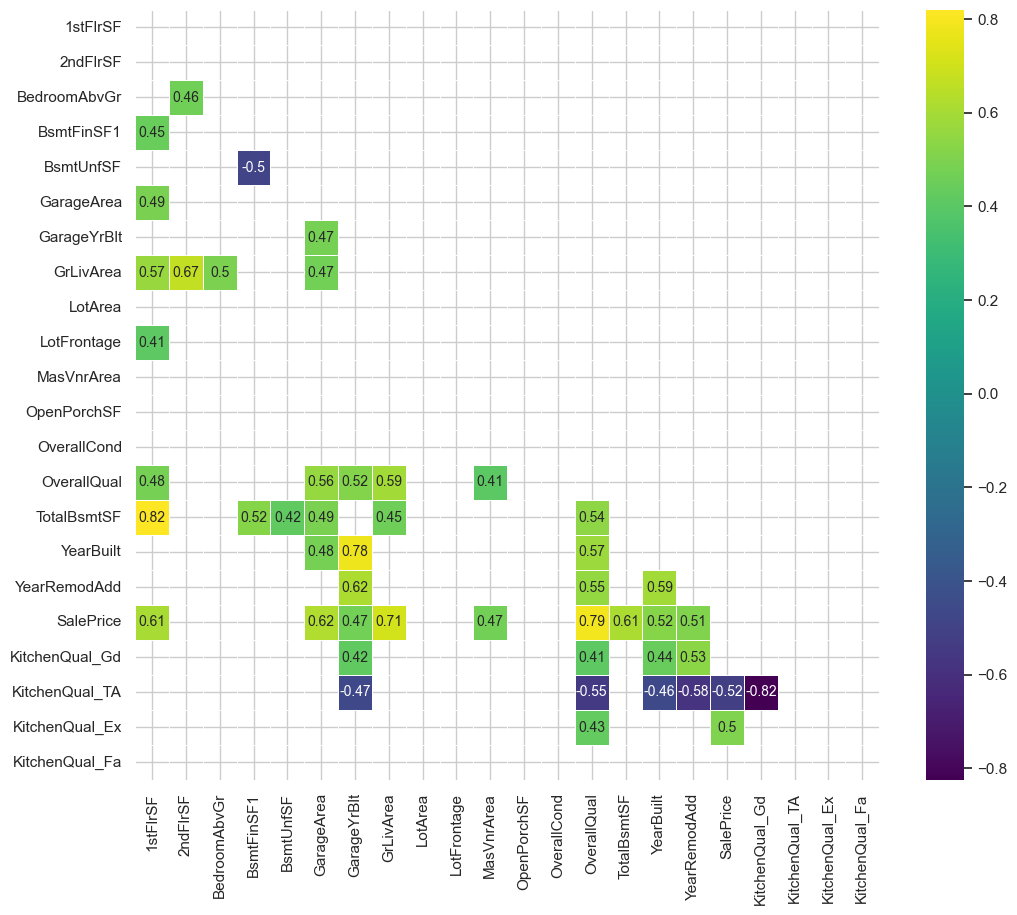



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



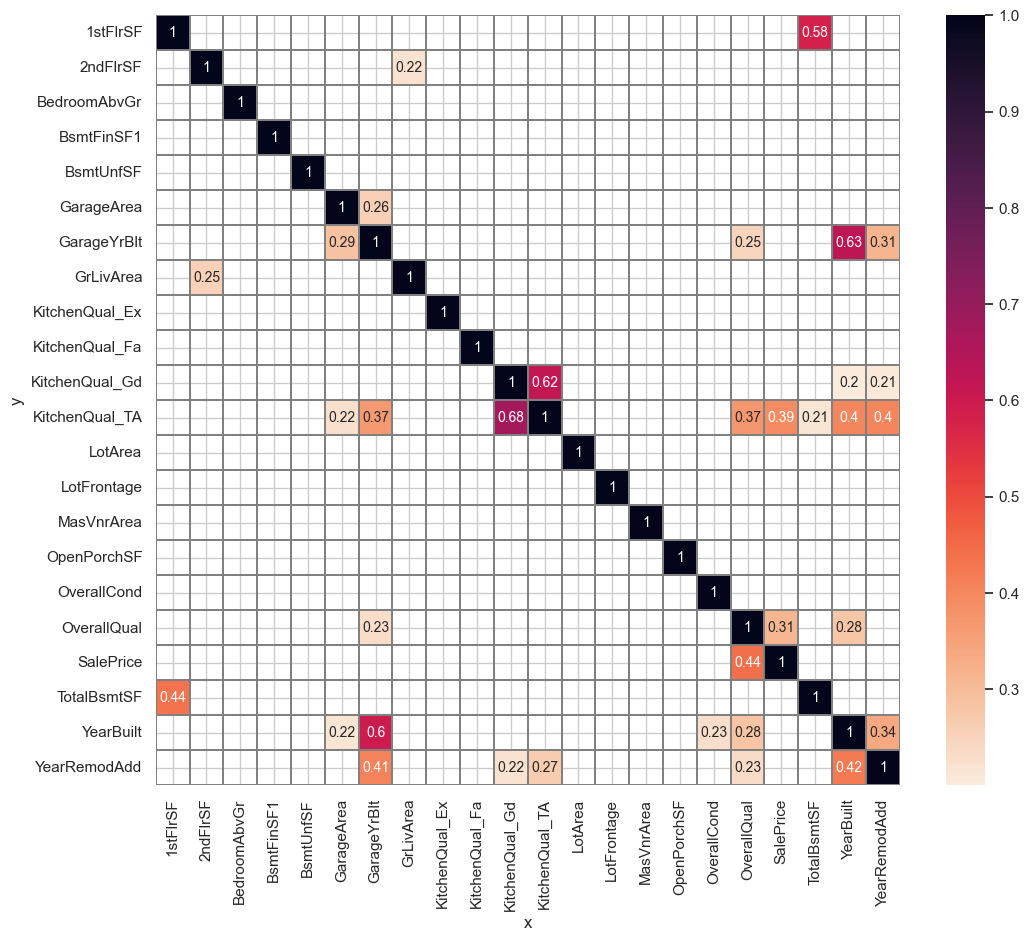

In [12]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

* df_corr_pearson and df_corr_spearman calculates correlation coefficients between feature pairs, i.e. the correlation coefficient between the feature and SalePrice
* Values of coefficients are sorted by absolute value (key=abs). This will show the features with the strongest correlation with SalePrice
* Heatmap has less than 10 feature with correlations above the threshold set at 0.4
* the spearman and person method each return a pandas series with the first item the correlatoin of SalePrice and SalePrice. As SalePrice is perfectly correlated with itself, this can be excluded (exclusion through [1:])

In [13]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
GarageYrBlt       0.564694
KitchenQual_Gd    0.478583
Name: SalePrice, dtype: float64

In [15]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
MasVnrArea        0.472614
Name: SalePrice, dtype: float64

* Conclusion on Pearson and Spearman correlation list calculated: Both correlations show that 'OverallQual' and 'GrLivAra' do have highest correlation with target ('SalePrice'). These two features high predictive value for the target variable
* High correlations for 'GarageArea', 'TotalBsmtSF' (total area in the basement), and '1stFlrSF' (square feet in first floor)
* Feature 'KitchenQual_TA' ('tpyical/average kitchen quality') with negative correlation suggests that kitchens of lower quality lower the SalePrice. 'KitchenQual_Gd' and 'KitchenQual_Ex' (good quality/excellent quality) are positively correlated with target

- Combining the Pearson and Spearman correlations to remove overlapping features

---

In [16]:
top_n = 10
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'MasVnrArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

Concluding from the combination of Pearson and Spearman with overlap removed, the following features have highest relationship to SalePrice

- '1stFlrSF',
- 'GarageArea',
- 'GarageYrBlt',
- 'GrLivArea',
- 'KitchenQual',
- 'MasVnrArea',
- 'OverallQual',
- 'TotalBsmtSF',
- 'YearBuilt',
- 'YearRemodAdd'

The top features suggest that size is important ('GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea'). Quality also matter ('OverallQual', 'KitchenQual'). Age of property or remodelling matter. The 'appeal', as measured by 'MasVnrArea' matters but less in relation to other features

In [17]:
vars_to_study = [
    '1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 
    'KitchenQual', 'MasVnrArea', 'OverallQual', 
    'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd'
]
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual',
 'MasVnrArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

## Exploratory Data Analysis on Variables

- An exploratory data analysis (EDA) is done for the features with 'moderate' or 'high' correlation with the target ('SalePrice')
- An EDA dataframe is created to display the relationship between the most important features determined via Pearson/Spearman with the target

In [18]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head()

,1stFlrSF,GarageArea,GarageYrBlt,GrLivArea,KitchenQual,MasVnrArea,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,548,2003.0,1710,Gd,196.0,7,856,2003,2003,208500
1,1262,460,1976.0,1262,TA,0.0,6,1262,1976,1976,181500
2,920,608,2001.0,1786,Gd,162.0,7,920,2001,2002,223500
3,961,642,1998.0,1717,Gd,0.0,7,756,1915,1970,140000
4,1145,836,2000.0,2198,Gd,350.0,8,1145,2000,2000,250000


### Target Analysis
#### Histogram of Sales Price distribution

- The target (SalesPrice) is displayed in a histogram to analyse the distribution of sales prices in the dataset

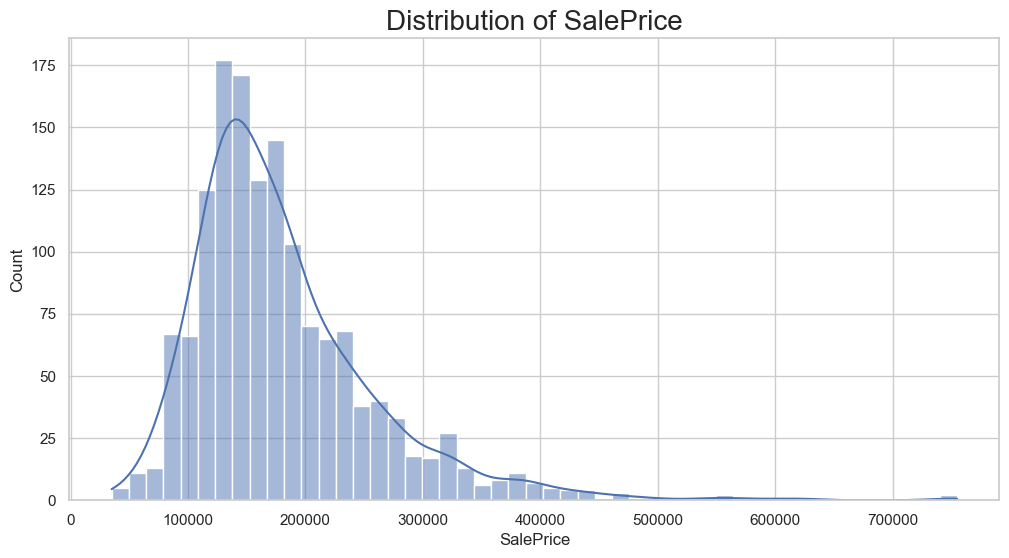

In [20]:
sns.set_style('whitegrid')
target_var = 'SalePrice'
time = ['YearBuilt', 'YearRemodAdd']

def plot_target_hist(df, target_var):
  """
  Function to create histogram of the values of target.
  Save histogram into docs/plots for use in dashboard
  """
  plt.figure(figsize=(12, 6))
  sns.histplot(data=df, x=target_var, kde=True)
  plt.title(f"Distribution of {target_var}", fontsize=20)
  plt.savefig(f'docs/plots/hist_plot_{target_var}.png', bbox_inches='tight')        
  plt.show()

plot_target_hist(df, target_var)

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [14]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (2852421808.py, line 5)